## 1. NLTK 모듈 로딩
 - nltk, 불용어 목록, Tokenizer

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

- text data loading

In [4]:
# trumph.txt: 트럼프 연설문
# spiderman1.txt: 스파이더맨1 스크립트
# frozen_script.txt: 겨울왕국 스크립트

data = open('../../data/trumph.txt').read()

In [5]:
data[:100]

'As long as I am President of the United States, Iran will never be allowed to have a nuclear weapon.'

- 형태소 분리

In [6]:
from nltk.tokenize.regexp import RegexpTokenizer
tokenizer = RegexpTokenizer("[\w']+")
token_raw_data = tokenizer.tokenize(data)
print(token_raw_data)

['As', 'long', 'as', 'I', 'am', 'President', 'of', 'the', 'United', 'States', 'Iran', 'will', 'never', 'be', 'allowed', 'to', 'have', 'a', 'nuclear', 'weapon', 'Good', 'morning', "I'm", 'pleased', 'to', 'inform', 'you', 'The', 'American', 'people', 'should', 'be', 'extremely', 'grateful', 'and', 'happy', 'no', 'Americans', 'were', 'harmed', 'in', 'last', 'night', 's', 'attack', 'by', 'the', 'Iranian', 'regime', 'We', 'suffered', 'no', 'casualties', 'all', 'of', 'our', 'soldiers', 'are', 'safe', 'and', 'only', 'minimal', 'damage', 'was', 'sustained', 'at', 'our', 'military', 'bases', 'Our', 'great', 'American', 'forces', 'are', 'prepared', 'for', 'anything', 'Iran', 'appears', 'to', 'be', 'standing', 'down', 'which', 'is', 'a', 'good', 'thing', 'for', 'all', 'parties', 'concerned', 'and', 'a', 'very', 'good', 'thing', 'for', 'the', 'world', 'No', 'American', 'or', 'Iraqi', 'lives', 'were', 'lost', 'because', 'of', 'the', 'precautions', 'taken', 'the', 'dispersal', 'of', 'forces', 'and',

- 불용어(stop words) 제거

In [17]:
stop_word_list = open('../../resource/eng_stop_word.txt').read()
token_data = [each_word for each_word in token_raw_data if (each_word not in stopwords.words()) and (each_word not in stop_word_list)]

# 1글자 이하 또는 10글자 이상 단어 삭제
filtered_token_data = []
for i in range(0, len(token_data)):
    if len(token_data[i]) >= 2 and len(token_data[i]) <= 10 :
        filtered_token_data.append(token_data[i])

# 카운팅 후 상위 100개 단어 필터링
from collections import Counter
cnt_filtered_token_data = dict(Counter(filtered_token_data).most_common(100))
print(cnt_filtered_token_data)

{'Iran': 20, 'American': 9, 'world': 7, 'United': 6, 'ISIS': 6, 'States': 5, 'nuclear': 5, 'Iranian': 5, 'military': 5, 'America': 5, 'Middle': 5, 'East': 5, 'Soleimani': 5, 'He': 5, 'deal': 5, 'long': 4, 'regime': 4, 'great': 4, 'terrorist': 4, 'lives': 3, 'including': 3, 'recent': 3, 'killed': 3, 'In': 3, 'powerful': 3, 'These': 3, 'death': 3, 'missiles': 3, 'Thank': 3, 'allowed': 2, 'night': 2, 'Our': 2, 'forces': 2, 'nations': 2, 'tolerated': 2, 'behavior': 2, 'days': 2, 'terrorism': 2, 'civilized': 2, 'targets': 2, 'wounded': 2, 'thousands': 2, 'attacks': 2, 'Iraq': 2, 'ago': 2, 'message': 2, 'options': 2, 'economic': 2, 'sanctions': 2, 'months': 2, 'fired': 2, 'signed': 2, 'billion': 2, 'chanted': 2, 'fact': 2, 'terror': 2, 'available': 2, 'country': 2, 'place': 2, 'JCPOA': 2, 'clear': 2, 'work': 2, 'stronger': 2, 'priorities': 2, 'oil': 2, 'natural': 2, 'caliphate': 2, 'Baghdadi': 2, 'future': 2, 'President': 1, 'weapon': 1, 'Good': 1, 'morning': 1, "I'm": 1, 'pleased': 1, 'info

- 시각화

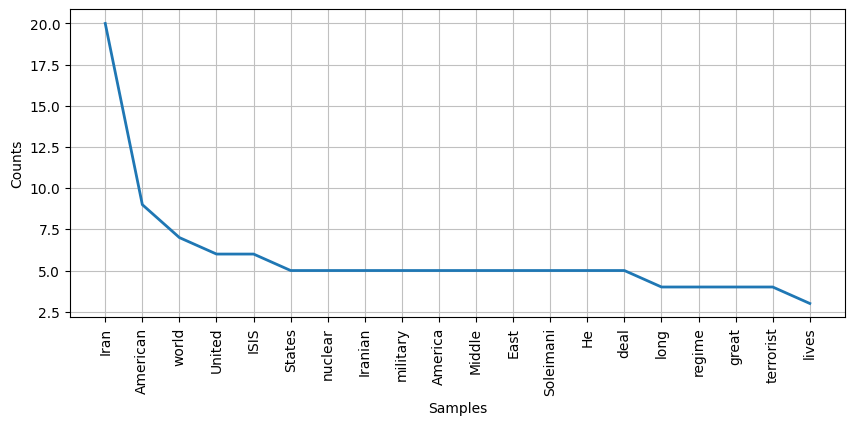

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,4))

g_data = nltk.Text(filtered_token_data, name = '다빈도 단어 그래프')
g_data.plot(20)

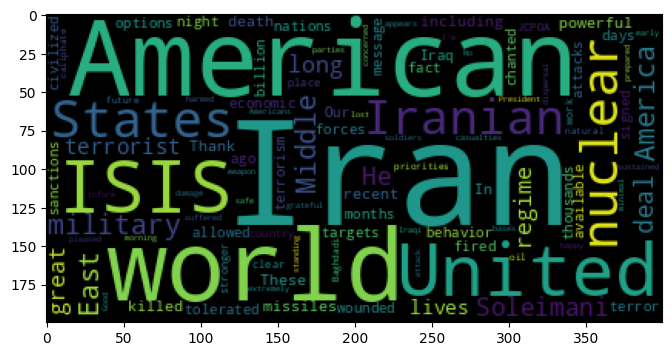

In [19]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(relative_scaling = 0.2, background_color = 'black').generate_from_frequencies(cnt_filtered_token_data)
plt.figure(figsize=(10,4))
plt.imshow(wordcloud)
plt.axis('on')
plt.show()

['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'